In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json

# Load JSON
with open("clustered_ranked_summaries.json", "r", encoding="utf-8") as f:
    ranked_data = json.load(f)

# Convert cluster IDs to integers
ranked_data = {int(k): v for k, v in ranked_data.items()}

C:\Users\pradh\AppData\Local\Temp\ipykernel_24480\402308807.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=cluster_ids, y=summary_counts, palette="viridis")


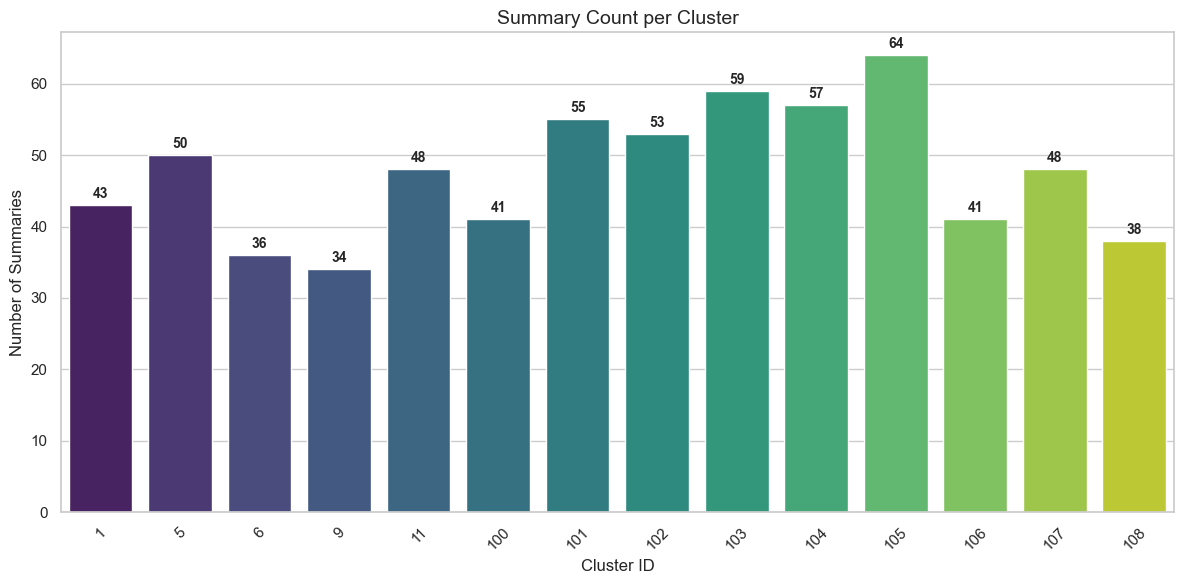

In [2]:
# Compute cluster sizes
cluster_sizes = {cluster_id: len(summaries) for cluster_id, summaries in ranked_data.items()}
cluster_ids = list(cluster_sizes.keys())
summary_counts = list(cluster_sizes.values())

# Aesthetic Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=cluster_ids, y=summary_counts, palette="viridis")

# Add count labels on top of bars
for bar, count in zip(bars.patches, summary_counts):
    height = bar.get_height()
    bars.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points",
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Cluster ID", fontsize=12)
plt.ylabel("Number of Summaries", fontsize=12)
plt.title("Summary Count per Cluster", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

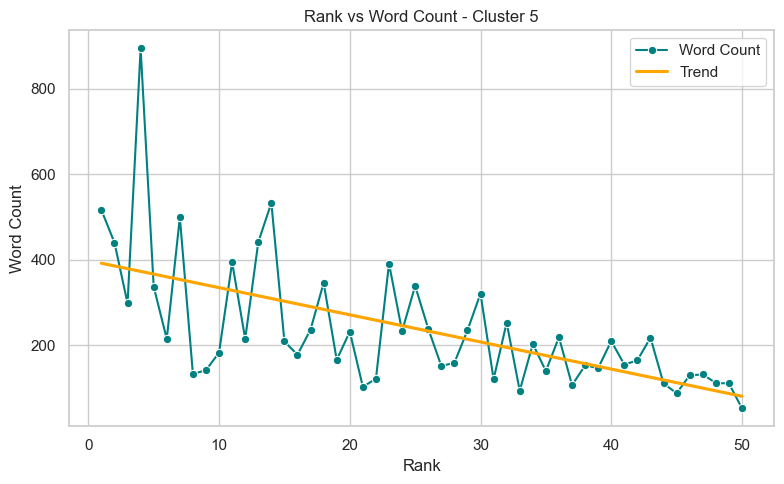

In [3]:
def plot_rank_vs_word_count(cluster_id):
    cluster = ranked_data.get(cluster_id, [])
    if not cluster:
        print("Invalid Cluster ID")
        return

    word_counts = [len(summary_dictionary['summary_text'].split()) for summary_dictionary in cluster]
    ranks = list(range(1, len(cluster) + 1))

    plt.figure(figsize=(8, 5))

    # Main line plot
    sns.lineplot(x=ranks, y=word_counts, marker="o", color="teal", label="Word Count")

    # Add regression (trend) line
    sns.regplot(x=ranks, y=word_counts, scatter=False, color="orange", label="Trend", ci=None)

    plt.title(f"Rank vs Word Count - Cluster {cluster_id}")
    plt.xlabel("Rank")
    plt.ylabel("Word Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_rank_vs_word_count(5)


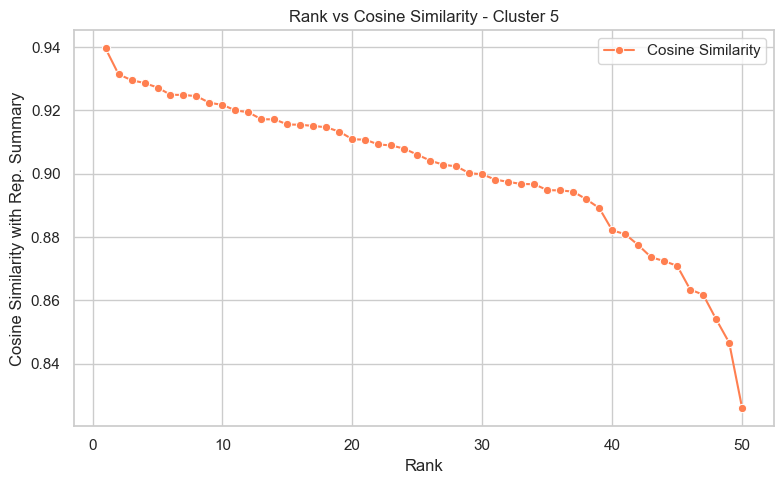

In [4]:
def plot_rank_vs_similarity(cluster_id):
    cluster = ranked_data.get(cluster_id, [])
    if not cluster:
        print("Invalid Cluster ID")
        return

    similarities = [summary_dicitonary['similarity_score'] for summary_dicitonary in cluster]
    ranks = list(range(1, len(cluster) + 1))

    plt.figure(figsize=(8, 5))

    # Main similarity line
    sns.lineplot(x=ranks, y=similarities, marker="o", color="coral", label="Cosine Similarity")

    plt.title(f"Rank vs Cosine Similarity - Cluster {cluster_id}")
    plt.xlabel("Rank")
    plt.ylabel("Cosine Similarity with Rep. Summary")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_rank_vs_similarity(5)


In [5]:
import pandas as pd
import json

# Load representative summaries
rep_df = pd.read_csv("Cluster_Representative_Summaries.csv")
rep_summary_map = {int(row["Cluster_ID"]): row["Representative_Summary"] for _, row in rep_df.iterrows()}

# Load ranked summaries
with open("clustered_ranked_summaries.json", "r", encoding="utf-8") as f:
    ranked_data = json.load(f)

# Convert cluster_id keys to int
ranked_data = {int(k): v for k, v in ranked_data.items()}

# Create final structured JSON
app_data = {}
for cluster_id, summaries in ranked_data.items():
    rep_summary = rep_summary_map.get(cluster_id, "")
    
    top3_dicts = [
        {summary["summary_id"]: summary["summary_text"]}
        for summary in summaries[:3]
    ]

    app_data[cluster_id] = [rep_summary] + top3_dicts

# Save to JSON file
with open("top3_summaries_app_data.json", "w", encoding="utf-8") as f:
    json.dump(app_data, f, indent=4, ensure_ascii=False)
